# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # mp_drawing.draw_detection(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Draw hand bounding boxes
    
        # Draw bounding box for hands
        if results.right_hand_landmarks:
            # Tính toán tọa độ của bounding box cho tay phải
            x_min = min(int(lm.x * frame.shape[1]) for lm in results.right_hand_landmarks.landmark)
            x_max = max(int(lm.x * frame.shape[1]) for lm in results.right_hand_landmarks.landmark)
            y_min = min(int(lm.y * frame.shape[0]) for lm in results.right_hand_landmarks.landmark)
            y_max = max(int(lm.y * frame.shape[0]) for lm in results.right_hand_landmarks.landmark)
            # Vẽ bounding box lên ảnh
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            
        if results.left_hand_landmarks:
            # Tính toán tọa độ của bounding box cho tay trái
            x_min = min(int(lm.x * frame.shape[1]) for lm in results.left_hand_landmarks.landmark)
            x_max = max(int(lm.x * frame.shape[1]) for lm in results.left_hand_landmarks.landmark)
            y_min = min(int(lm.y * frame.shape[0]) for lm in results.left_hand_landmarks.landmark)
            y_max = max(int(lm.y * frame.shape[0]) for lm in results.left_hand_landmarks.landmark)
            # Vẽ bounding box lên ảnh
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): # Q to release
            break
    cap.release()
    cv2.destroyAllWindows()

In [183]:
type(results.right_hand_landmarks)

NoneType

In [188]:
cap.release()
cv2.destroyAllWindows()

In [176]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [129]:
draw_landmarks(frame, results)


In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

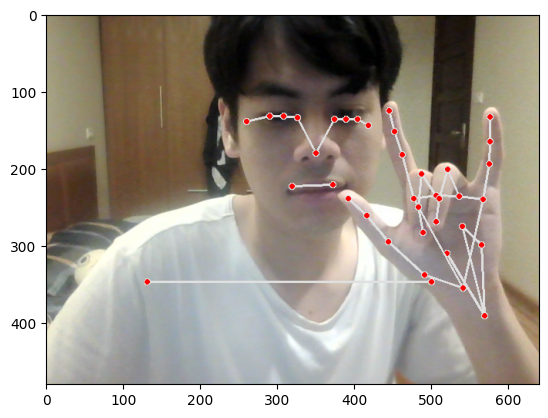

In [130]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [131]:
len(results.left_hand_landmarks.landmark)

21

In [132]:
len(results.pose_landmarks.landmark)

33

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose

In [189]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [190]:
len(results.face_landmarks.landmark) * 3

1404

In [192]:
type(results.left_hand_landmarks.landmark) 


google.protobuf.pyext._message.RepeatedCompositeContainer

In [194]:
lh.shape

(63,)

In [26]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else  np.zeros(1404)
face


array([ 0.48380953,  0.47375831, -0.03757947, ...,  0.58714014,
        0.24403802,  0.02302953])

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    # return np.concatenate([pose, face, lh, rh])
    return np.concatenate([pose, lh, rh])
    

In [28]:
result_test = extract_keypoints(results)

In [29]:
extract_keypoints(results).shape

(258,)

In [ ]:
result_test

In [31]:
len(result_test)

258

In [61]:
468*3+33*4+21*3+21*3

1662

In [62]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

In [64]:
len(np.load('0.npy'))

258

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'fuckyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [81]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [84]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)), exist_ok=True)
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [83]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'): # Q to release
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [72]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'fuckyou': 3}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(120, 30, 258)

In [29]:
np.array(labels).shape

(120,)

In [30]:
X = np.array(sequences)

In [92]:
X.shape

(120, 30, 258)

In [93]:
y = to_categorical(labels).astype(int)

In [94]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [96]:
y_test.shape

(6, 4)

# 7. Build and Train LSTM Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [14]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258))) #1662
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [16]:
res = [.2, 0.6, 0.1, 0.1]

In [17]:
actions[np.argmax(res)]

'thanks'

In [110]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [111]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback]) 

Epoch 1/200


4/4 [==============================] - 3s 35ms/step - loss: 1.4568 - categorical_accuracy: 0.3158
Epoch 2/200
4/4 [==============================] - 0s 32ms/step - loss: 1.3554 - categorical_accuracy: 0.2719
Epoch 3/200
4/4 [==============================] - 0s 32ms/step - loss: 1.2341 - categorical_accuracy: 0.2895
Epoch 4/200
4/4 [==============================] - 0s 33ms/step - loss: 1.0996 - categorical_accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 33ms/step - loss: 1.0822 - categorical_accuracy: 0.4474
Epoch 6/200
4/4 [==============================] - 0s 35ms/step - loss: 1.0318 - categorical_accuracy: 0.5088
Epoch 7/200
4/4 [==============================] - 0s 32ms/step - loss: 1.0780 - categorical_accuracy: 0.5526
Epoch 8/200
4/4 [==============================] - 0s 32ms/step - loss: 1.0566 - categorical_accuracy: 0.5526
Epoch 9/200
4/4 [==============================] - 0s 31ms/step - loss: 1.0997 - categorical_accuracy: 0.5789
Epoch 10/200
4/4 [====

In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            82688     
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 4)                 132       
                                                                 
Total params: 237284 (926.89 KB)
Trainable params: 237

# 8. Make Predictions

In [113]:
res = model.predict(X_test)

1/1 [==============================] - 0s 256ms/step


In [114]:
actions[np.argmax(res[4])]

'fuckyou'

In [115]:
actions[np.argmax(y_test[4])]

'fuckyou'

# 9. Save Weights

In [116]:
model.save('action.h5')

e:\VSCode_Workspace\HMI\Sign_Language_Recognition\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [108]:
del model

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258))) #1662
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [11]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [33]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [119]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [120]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 2]],

       [[4, 0],
        [0, 2]],

       [[4, 0],
        [0, 2]]], dtype=int64)

In [121]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [35]:
colors = [(245,117,16), (117,245,16), (16,117,245), [245, 117, 16]]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [36]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [72]:
sequence.reverse()

In [73]:
len(sequence)

30

In [74]:
sequence.append('def')

In [75]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [14]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        # Draw landmarks
        # draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        if results.right_hand_landmarks or results.left_hand_landmarks:
            keypoints = extract_keypoints(results)
    #         sequence.insert(0,keypoints)
    #         sequence = sequence[:30]
            sequence.append(keypoints)
            sequence = sequence[-30:]
            
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                # print(actions[np.argmax(res)])
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                # image = prob_viz(res, actions, image, colors)
                
                if results.right_hand_landmarks:
                    
                    x_min = min(int(lm.x * image.shape[1]) for lm in results.right_hand_landmarks.landmark) - 15
                    x_max = max(int(lm.x * image.shape[1]) for lm in results.right_hand_landmarks.landmark) + 15
                    y_min = min(int(lm.y * image.shape[0]) for lm in results.right_hand_landmarks.landmark) - 15
                    y_max = max(int(lm.y * image.shape[0]) for lm in results.right_hand_landmarks.landmark) + 15
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 255), 4)
                    
                    cv2.rectangle(image, (x_min, y_min - 25), (x_max, y_min), (0, 255, 255), cv2.FILLED)
                    cv2.putText(image, "Right: " + actions[np.argmax(res)] , (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
                    
                if results.left_hand_landmarks:
                    x_min = min(int(lm.x * image.shape[1]) for lm in results.left_hand_landmarks.landmark) - 15
                    x_max = max(int(lm.x * image.shape[1]) for lm in results.left_hand_landmarks.landmark)  + 15
                    y_min = min(int(lm.y * image.shape[0]) for lm in results.left_hand_landmarks.landmark) - 15
                    y_max = max(int(lm.y * image.shape[0]) for lm in results.left_hand_landmarks.landmark) + 15
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 255), 4)
                    cv2.rectangle(image, (x_min, y_min - 25), (x_max, y_min), (0, 255, 255), cv2.FILLED)
                    cv2.putText(image, "Left: " + actions[np.argmax(res)], (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
                
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                 cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & cv2.waitKey(10) == 27: # ESC to release
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


In [13]:
cap.release()
cv2.destroyAllWindows()

In [137]:
res[np.argmax(res)] > threshold

True

In [138]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [139]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 20ms/step


array([[9.9702615e-01, 3.8611121e-11, 2.9677351e-03, 6.2054082e-06]],
      dtype=float32)